In [2]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [4]:
# Old file
# home_audio = pd.read_csv('C:/Data Science/Capstone Project/Model Files/HomeAudio.csv')

home_audio = pd.read_csv('C:/Data Science/Capstone Project/HomeAudio.csv')
home_audio.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [5]:
home_audio = home_audio.drop(['Unnamed: 0'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [6]:
# Drop lag, MA and GMV columns
home_audio = home_audio.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_1_per','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,2015-10-03-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,2015-10-16-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,2015-10-16-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,2015-10-16-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,2015-10-20-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [7]:
# Drop categorical variable columns
home_audio = home_audio.drop(['Year','Month','order_id','order_item_id','order_date'], axis=1)
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"7,049.00",1,0,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-03-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"5,489.00",1,0,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-16-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"6,255.00",1,0,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-16-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"6,099.00",1,0,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-16-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"6,850.00",1,0,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-20-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [8]:
# Drop categorical variable columns
home_audio = home_audio.drop(['month_date'], axis=1)
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,ItemType,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"7,049.00",1,0,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,Luxury,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"5,489.00",1,0,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,Luxury,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"6,255.00",1,0,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,Luxury,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"6,099.00",1,0,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,Luxury,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"6,850.00",1,0,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,Luxury,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


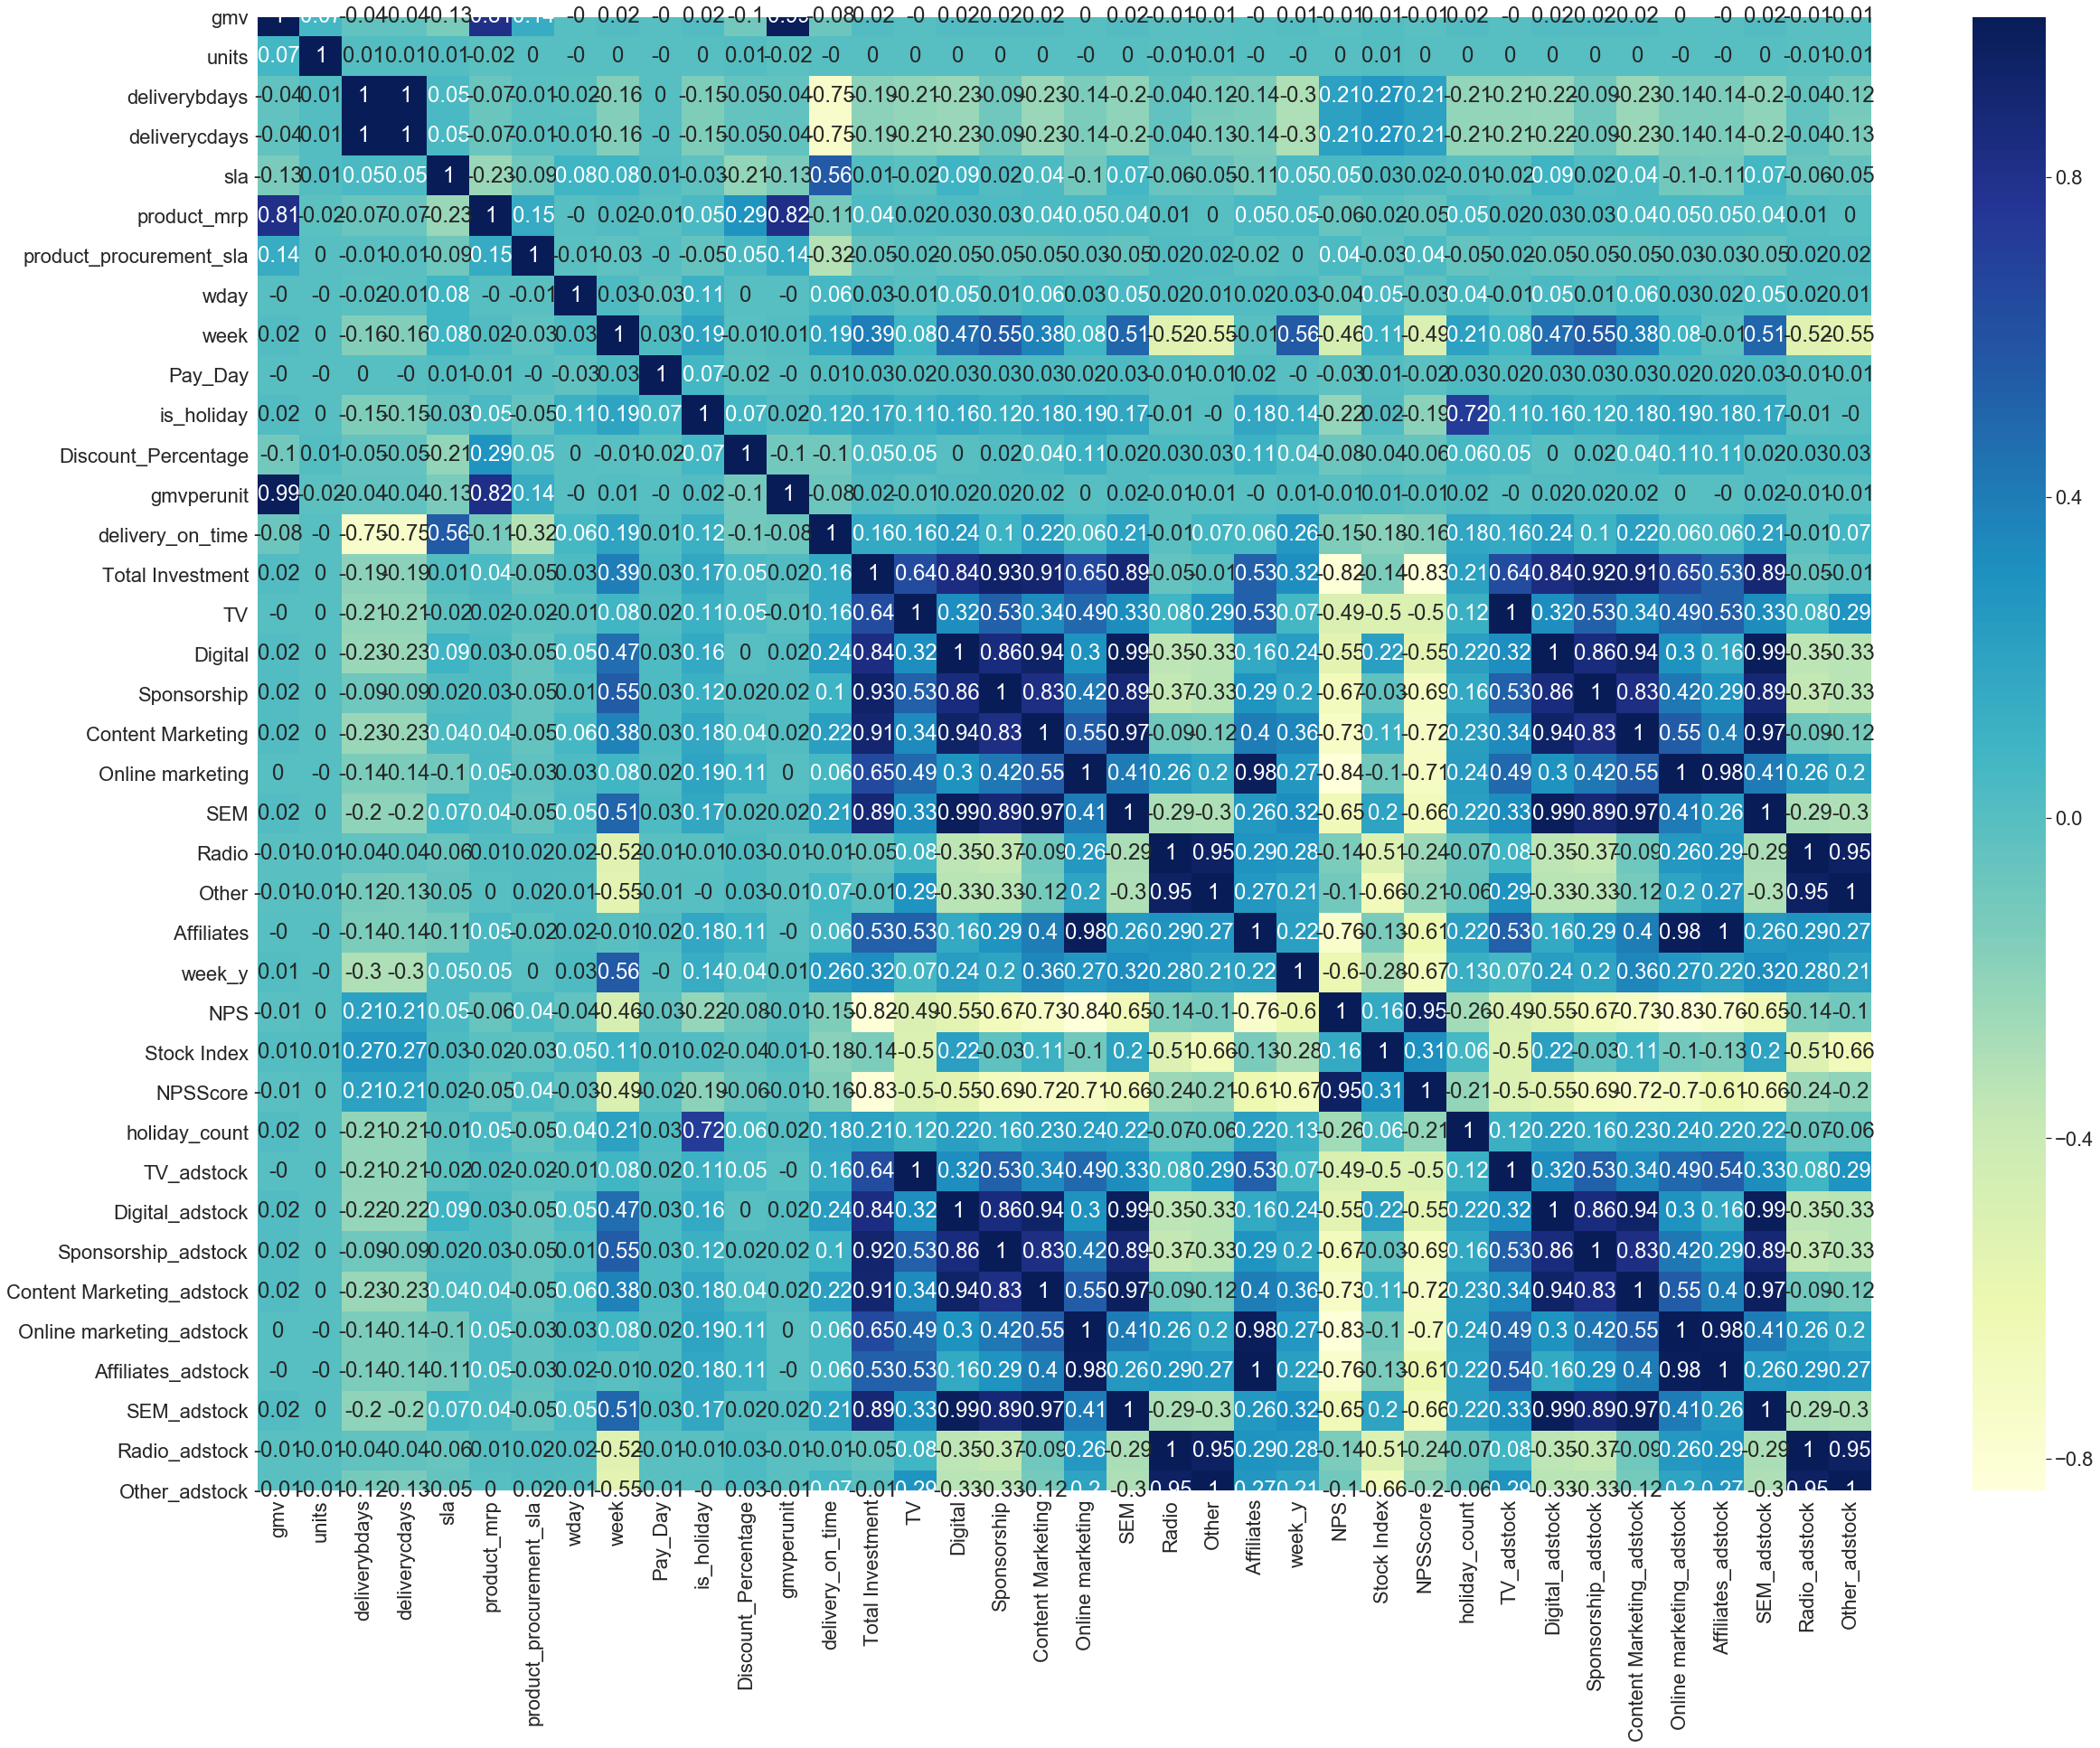

In [780]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(home_audio.corr(), 2), annot=True, cmap="YlGnBu")

In [9]:
home_audio = home_audio.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock'], axis=1)

# Doubtful
# product_mrp
home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,SEM,Radio,Other,Affiliates,week_y,NPS,Stock Index,NPSScore,holiday_count,ItemType
0,"7,049.00",1,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury
1,"5,489.00",1,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury
2,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury
3,"6,099.00",1,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury
4,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury


In [10]:
home_audio.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'week', 'Pay_Day', 'is_holiday', 'special_sale',
       'Discount_Percentage', 'delivery_on_time', 'delivery_status',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'SEM', 'Radio', 'Other', ' Affiliates', 'week_y',
       'NPS', 'Stock Index', 'NPSScore', 'holiday_count', 'ItemType'],
      dtype='object')

In [11]:
home_audio.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
wday                             0
week                             0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
 Affiliates                      0
week_y              

In [12]:
home_audio.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [13]:
home_audio.shape

(97387, 34)

In [14]:
##describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
home_audio.describe()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,Stock Index,NPSScore,holiday_count
count,"97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00",...,"97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00"
mean,"2,193.18",1.01,0.84,5.66,"3,934.31",2.65,3.00,26.46,0.06,0.21,...,"43,139,493.17","22,741,042.80","1,089,306.58","11,597,821.02","13,594,024.21",29.96,48.26,"1,155.65",11.07,1.20
std,"2,031.54",0.17,2.16,2.92,"3,630.33",1.41,1.94,17.40,0.24,0.41,...,"14,926,030.19","22,149,336.92","1,991,353.71","20,998,477.06","4,377,084.46",17.12,2.93,86.48,0.80,1.67
min,129.00,1.00,0.00,0.00,189.00,0.00,0.00,1.00,0.00,0.00,...,"291,841.89","5,675,708.40",0.00,0.00,"166,383.18",5.00,44.40,"1,015.00",10.03,0.00
25%,"1,070.00",1.00,0.00,4.00,"1,735.00",1.00,1.00,10.00,0.00,0.00,...,"41,633,783.21","11,343,832.94",0.00,0.00,"14,039,892.47",13.00,45.80,"1,052.00",10.34,0.00
50%,"1,999.00",1.00,0.00,5.00,"3,499.00",2.00,3.00,24.00,0.00,0.00,...,"48,016,056.55","11,763,933.86",0.00,0.00,"15,415,666.31",27.00,47.31,"1,210.00",10.97,0.00
75%,"2,690.00",1.00,0.00,7.00,"5,399.00",4.00,5.00,44.00,0.00,0.00,...,"51,709,677.42","25,247,488.07","1,964,516.13","11,260,967.74","15,747,089.60",44.00,50.33,"1,222.00",12.09,3.00
max,"75,000.00",19.00,28.00,41.00,"98,000.00",14.00,6.00,53.00,1.00,1.00,...,"55,033,046.50","72,093,251.50","6,096,774.19","61,170,967.74","16,641,935.48",53.00,59.99,"1,242.00",13.55,6.00


In [15]:
home_audio['delivery_on_time'].unique()

array([  0.,  -3.,   4.,  -2.,  -1.,   1.,   5.,   2.,   3.,   6.,   9.,
        11.,  10.,   8.,   7.,  13.,  -4.,  12., -11.,  15.,  14.,  -5.,
       -13.,  40., -31.,  17.,  18.,  16.,  -8.,  22.,  -9.,  21.,  23.,
        -7., -21.,  -6., -12., -10., -20., -15., -19.,  20., -18., -29.,
       -14., -17., -16., -23.,  24., -22., -38., -28., -37., -45., -30.,
       -32., -26., -24., -34.,  19., -27., -41., -46., -25.])

In [16]:
# home_audio=home_audio.loc[(home_audio['delivery_on_time']>0)]
# home_audio.head()

In [17]:
home_audio.shape

(97387, 34)

In [18]:
# Subset all categorical variables
home_audio_categorical = home_audio.select_dtypes(include=['object'])
home_audio_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,On time,Luxury
1,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Delayed,Luxury
2,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
3,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Delayed,Luxury
4,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury


In [19]:
# Subset all numerical variables
home_audio_numerical = home_audio.select_dtypes(include=['int64','float64'])
home_audio_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,Stock Index,NPSScore,holiday_count
0,"7,049.00",1,0,5,"7,499.00",5,5,40,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00
1,"5,489.00",1,0,2,"7,499.00",5,4,42,0,1,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00
2,"6,255.00",1,0,9,"7,499.00",5,4,42,0,1,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00
3,"6,099.00",1,0,3,"7,499.00",5,4,42,0,1,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00
4,"6,850.00",1,0,9,"7,499.00",5,1,43,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00


In [20]:
# Convert into dummies
dummies = pd.get_dummies(home_audio_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,...,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,delivery_status_Early,delivery_status_On time,ItemType_MassMarket
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [21]:
# Drop categorical variable columns
home_audio = home_audio.drop(list(home_audio_categorical.columns), axis=1)

In [22]:
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,Stock Index,NPSScore,holiday_count
0,"7,049.00",1,0,5,"7,499.00",5,5,40,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00
1,"5,489.00",1,0,2,"7,499.00",5,4,42,0,1,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00
2,"6,255.00",1,0,9,"7,499.00",5,4,42,0,1,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00
3,"6,099.00",1,0,3,"7,499.00",5,4,42,0,1,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00
4,"6,850.00",1,0,9,"7,499.00",5,1,43,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00


In [23]:
# Concatenate dummy variables with X
home_audio = pd.concat([home_audio, dummies], axis=1)
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,delivery_status_Early,delivery_status_On time,ItemType_MassMarket
0,"7,049.00",1,0,5,"7,499.00",5,5,40,0,0,...,0,0,0,0,1,0,0,0,1,0
1,"5,489.00",1,0,2,"7,499.00",5,4,42,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"6,255.00",1,0,9,"7,499.00",5,4,42,0,1,...,0,0,0,0,0,0,0,1,0,0
3,"6,099.00",1,0,3,"7,499.00",5,4,42,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"6,850.00",1,0,9,"7,499.00",5,1,43,0,0,...,0,0,0,0,1,0,0,1,0,0


In [24]:
home_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97387 entries, 0 to 97386
Data columns (total 51 columns):
gmv                                           97387 non-null float64
units                                         97387 non-null int64
deliverycdays                                 97387 non-null int64
sla                                           97387 non-null int64
product_mrp                                   97387 non-null float64
product_procurement_sla                       97387 non-null int64
wday                                          97387 non-null int64
week                                          97387 non-null int64
Pay_Day                                       97387 non-null int64
is_holiday                                    97387 non-null int64
Discount_Percentage                           97387 non-null float64
delivery_on_time                              97387 non-null float64
Total Investment                              97387 non-null float64
TV        

In [25]:
# missing information
home_audio.isnull().any()

gmv                                           False
units                                         False
deliverycdays                                 False
sla                                           False
product_mrp                                   False
product_procurement_sla                       False
wday                                          False
week                                          False
Pay_Day                                       False
is_holiday                                    False
Discount_Percentage                           False
delivery_on_time                              False
Total Investment                              False
TV                                            False
Digital                                       False
Sponsorship                                   False
Content Marketing                             False
Online marketing                              False
SEM                                           False
Radio       

In [26]:
# for col in list(home_audio.columns):
#     plt.figure(figsize=(9,9))
#     sns.boxplot(data=home_audio, y=col).set_title(col)
    

In [27]:
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

In [28]:
# outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
#                'Online marketing', 'SEM', 'Affiliates', 'Digital', 'Content Marketing', 'Radio']

In [29]:
# for col in outlier_cols:
#     remove_outlier(home_audio, col)

In [30]:
home_audio.shape

(97387, 51)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
df_train, df_test = train_test_split(home_audio, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
home_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97387 entries, 0 to 97386
Data columns (total 51 columns):
gmv                                           97387 non-null float64
units                                         97387 non-null int64
deliverycdays                                 97387 non-null int64
sla                                           97387 non-null int64
product_mrp                                   97387 non-null float64
product_procurement_sla                       97387 non-null int64
wday                                          97387 non-null int64
week                                          97387 non-null int64
Pay_Day                                       97387 non-null int64
is_holiday                                    97387 non-null int64
Discount_Percentage                           97387 non-null float64
delivery_on_time                              97387 non-null float64
Total Investment                              97387 non-null float64
TV        

In [36]:
home_audio['gmv'].unique()

array([7049., 5489., 6255., ..., 4895., 4775., 9600.])

In [37]:
# Create a list of the variables that you need to scale
varlist1 = ['gmv', 'units', 'deliverycdays', 'sla','product_mrp', 'product_procurement_sla', 'wday', 'week',
           'Discount_Percentage', 'delivery_on_time', 'Total Investment', 'TV',
           'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'SEM', 'Other', 'Affiliates', 'NPS',
           'NPSScore', 'holiday_count', 'Pay_Day', 'is_holiday']

# 'Pay_Day', 'is_holiday'

In [38]:
# Scale these variables using 'fit_transform'
df_train[varlist1] = scaler.fit_transform(df_train[varlist1])

In [39]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,delivery_status_Early,delivery_status_On time,ItemType_MassMarket
59983,0.05,0.00,0.00,0.12,0.13,0.29,0.00,0.21,0.00,0.00,...,0,0,0,0,1,0,0,0,0,0
41532,0.03,0.00,0.00,0.40,0.04,0.07,0.67,0.00,0.00,0.00,...,0,0,0,0,1,0,0,1,0,1
28806,0.05,0.00,0.00,0.12,0.13,0.29,0.17,0.94,0.00,0.00,...,0,0,0,0,1,0,0,0,0,0
87064,0.02,0.00,0.04,0.24,0.05,0.14,0.67,0.46,0.00,0.00,...,0,0,0,0,1,0,0,1,0,1
751,0.06,0.00,0.00,0.36,0.07,0.36,1.00,0.79,0.00,0.00,...,0,0,0,0,1,0,0,1,0,0


In [40]:
# Split the train dataset into X and y
y_train = df_train.pop('gmv')
X_train = df_train

In [41]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 3.79439207e-01  5.67592062e-03  1.22920976e-03  4.67564793e-01
  5.18965269e-05  4.05923965e-06 -7.59594890e-04 -8.38504429e-05
  3.26778455e-05 -6.01436545e-02 -1.49251086e-03  1.77142361e+00
 -7.67029289e+00  1.79740614e+01  7.08210738e+00 -2.03022450e+01
  6.69761000e+00 -2.92039000e+00 -1.07538570e-08  5.12491953e+00
  2.72191963e+00  4.49782547e-02  3.28803601e+00 -1.18171118e-04
  3.70367973e+00 -1.06984178e-04  1.90961491e-03  5.86019722e-02
 -4.44536061e-03 -9.98450234e-03 -9.19919319e-03  5.85622221e-03
 -4.65547041e-03  6.44052903e-02 -5.52687556e-03  4.16942936e-02
  3.22001985e-03  7.38566915e-04  1.86289111e-03  2.04013407e-03
  6.72871746e-04  7.44481882e-04  2.94887434e-03  1.47734781e-03
  9.19584854e-04  2.17245694e-03  7.69909325e-04  4.27075632e-03
  2.61540404e-03 -1.11748644e-02]
-9.426170776260692


In [43]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True False False  True False False False False False  True False  True
  True  True  True  True  True  True False  True  True False  True False
  True False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False]
[ 1 11 20  1 33 35 23 32 34  1 18  1  1  1  1  1  1  1 36  1  1  4  1 30
  1 31 17  2 10  6  7 13  9  1  8  3 14 28 22 21 29 27 16 24 25 19 26 12
 15  5]


In [44]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,product_mrp,Discount_Percentage,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Other,Affiliates,NPS,NPSScore,product_analytic_vertical_KaraokePlayer
59983,1.00,0.00,0.13,0.64,0.58,1.00,0.14,0.48,0.11,0.76,0.09,0.59,0.84,0.30,0.30,0
41532,1.00,0.00,0.04,0.19,0.42,0.47,0.00,0.04,0.26,0.94,0.06,1.00,1.00,0.17,0.17,0
28806,1.00,0.00,0.13,0.67,0.62,0.58,0.21,0.67,0.31,0.92,0.29,0.00,0.93,0.09,0.09,0
87064,1.00,0.00,0.05,0.68,0.24,0.18,0.08,0.30,0.01,0.33,0.05,0.00,0.38,0.39,0.50,0
751,1.00,0.00,0.07,0.20,1.00,0.66,1.00,1.00,1.00,1.00,1.00,0.00,0.95,0.00,0.00,0


In [45]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 1.681e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:05:25   Log-Likelihood:             1.7513e+05
No. Observations:               68170   AIC:                        -3.502e+05
Df Residuals:                   68154   BIC:                        -3.501e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [48]:
# Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Total Investment,"1,870,902,338.80"
7,Sponsorship,"665,677,909.24"
10,SEM,"169,109,067.17"
9,Online marketing,"101,943,373.87"
11,Other,"101,343,476.88"
12,Affiliates,"40,713,476.78"
6,Digital,"11,588,782.89"
5,TV,"8,756,022.08"
0,const,"7,823,455.58"
14,NPSScore,"7,244,179.03"


In [49]:
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 1.782e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:05:38   Log-Likelihood:             1.7484e+05
No. Observations:               68170   AIC:                        -3.496e+05
Df Residuals:                   68155   BIC:                        -3.495e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1090      0.199      0.547      0.584      -0.281       0.499
units                                       0.3828      0.007     52.215      0.000       0.368       0.397
product_mrp                                 0.5231      0.001    494.011      0.000       0.521       0.525
Discount_Percentage                        -0.0677      0.000   -195.328      0.000      -0.068      -0.067
TV                                          0.1693      0.401      0.422      0.673      -0.617       0.956
Digital                                    -0.2943      0.634     -0.464      0.642      -1.536       0.948
Sponsorship                                -0.1298      0.321     -0.404      0.686      -0.760       0.500
Content Marketing                          -0.0336      0.041     -0.817      0.414      -0.114       0.047
Online marketing                            0.6608      1.416      0.467      0.641      -2.114       3.436
SEM                                         0.3476      0.649      0.535      0.592      -0.925       1.620
Other                                       0.0066      0.022      0.294      0.769      -0.037       0.050
Affiliates                                 -0.7837      1.708     -0.459      0.646      -4.131       2.563
NPS                                        -0.4075      0.855     -0.476      0.634      -2.084       1.269
NPSScore                                    0.3563      0.718      0.497      0.619      -1.050       1.763
product_analytic_vertical_KaraokePlayer     0.0675      0.019      3.626      0.000       0.031       0.104
==============================================================================
Omnibus:                    60917.706   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        130002004.551
Skew:                          -2.991   Prob(JB):                         0.00
Kurtosis:                     216.852   Cond. No.                     6.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
11,Affiliates,"40,295,392.27"
8,Online marketing,"29,184,067.88"
9,SEM,"9,220,005.00"
5,Digital,"8,977,044.54"
0,const,"7,798,730.47"
13,NPSScore,"5,228,946.89"
12,NPS,"5,070,760.20"
4,TV,"2,210,754.28"
6,Sponsorship,"2,155,003.06"
7,Content Marketing,"36,337.77"


In [51]:
X_train_rfe1 = X_train_rfe1.drop('Affiliates', axis=1)

lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 1.919e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:05:57   Log-Likelihood:             1.7484e+05
No. Observations:               68170   AIC:                        -3.496e+05
Df Residuals:                   68156   BIC:                        -3.495e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0176      0.001     15.363      0.000       0.015       0.020
units                                       0.3828      0.007     52.215      0.000       0.368       0.397
product_mrp                                 0.5231      0.001    494.014      0.000       0.521       0.525
Discount_Percentage                        -0.0677      0.000   -195.333      0.000      -0.068      -0.067
TV                                         -0.0149      0.001    -10.422      0.000      -0.018      -0.012
Digital                                    -0.0035      0.004     -0.806      0.420      -0.012       0.005
Sponsorship                                 0.0177      0.001     13.910      0.000       0.015       0.020
Content Marketing                          -0.0523      0.005    -10.631      0.000      -0.062      -0.043
Online marketing                            0.0110      0.002      6.528      0.000       0.008       0.014
SEM                                         0.0497      0.005      9.416      0.000       0.039       0.060
Other                                       0.0168      0.001     12.243      0.000       0.014       0.019
NPS                                        -0.0149      0.003     -4.556      0.000      -0.021      -0.009
NPSScore                                    0.0270      0.003      8.765      0.000       0.021       0.033
product_analytic_vertical_KaraokePlayer     0.0675      0.019      3.626      0.000       0.031       0.104
==============================================================================
Omnibus:                    60916.396   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        130007528.360
Skew:                          -2.990   Prob(JB):                         0.00
Kurtosis:                     216.857   Cond. No.                         427.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
9,SEM,609.28
7,Content Marketing,521.16
5,Digital,414.90
0,const,257.45
12,NPSScore,96.27
11,NPS,74.53
10,Other,43.62
8,Online marketing,41.69
6,Sponsorship,33.64
4,TV,28.09


In [53]:
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 2.076e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:06:06   Log-Likelihood:             1.7479e+05
No. Observations:               68170   AIC:                        -3.496e+05
Df Residuals:                   68157   BIC:                        -3.494e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0207      0.001     18.868      0.000       0.019       0.023
units                                       0.3837      0.007     52.313      0.000       0.369       0.398
product_mrp                                 0.5230      0.001    493.610      0.000       0.521       0.525
Discount_Percentage                        -0.0679      0.000   -195.637      0.000      -0.069      -0.067
TV                                         -0.0121      0.001     -8.651      0.000      -0.015      -0.009
Digital                                     0.0198      0.004      5.610      0.000       0.013       0.027
Sponsorship                                 0.0145      0.001     11.839      0.000       0.012       0.017
Content Marketing                          -0.0287      0.004     -6.779      0.000      -0.037      -0.020
Online marketing                            0.0119      0.002      7.066      0.000       0.009       0.015
Other                                       0.0087      0.001      8.145      0.000       0.007       0.011
NPS                                         0.0045      0.003      1.747      0.081      -0.001       0.009
NPSScore                                    0.0044      0.002      2.270      0.023       0.001       0.008
product_analytic_vertical_KaraokePlayer     0.0677      0.019      3.634      0.000       0.031       0.104
==============================================================================
Omnibus:                    60699.248   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        129583717.950
Skew:                          -2.969   Prob(JB):                         0.00
Kurtosis:                     216.509   Cond. No.                         420.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,Content Marketing,386.22
5,Digital,278.29
0,const,236.04
10,NPS,45.10
8,Online marketing,41.56
11,NPSScore,37.72
6,Sponsorship,31.30
4,TV,26.88
9,Other,26.65
3,Discount_Percentage,1.11


In [55]:
X_train_rfe1 = X_train_rfe1.drop('Content Marketing', axis=1)

lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 2.263e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:06:13   Log-Likelihood:             1.7477e+05
No. Observations:               68170   AIC:                        -3.495e+05
Df Residuals:                   68158   BIC:                        -3.494e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0262      0.001     35.878      0.000       0.025       0.028
units                                       0.3836      0.007     52.282      0.000       0.369       0.398
product_mrp                                 0.5228      0.001    493.450      0.000       0.521       0.525
Discount_Percentage                        -0.0679      0.000   -195.997      0.000      -0.069      -0.067
TV                                         -0.0032      0.000     -6.761      0.000      -0.004      -0.002
Digital                                    -0.0039      0.000     -8.072      0.000      -0.005      -0.003
Sponsorship                                 0.0085      0.001     10.029      0.000       0.007       0.010
Online marketing                            0.0015      0.001      2.151      0.031       0.000       0.003
Other                                       0.0022      0.000      4.709      0.000       0.001       0.003
NPS                                         0.0039      0.003      1.523      0.128      -0.001       0.009
NPSScore                                    0.0040      0.002      2.092      0.036       0.000       0.008
product_analytic_vertical_KaraokePlayer     0.0677      0.019      3.634      0.000       0.031       0.104
==============================================================================
Omnibus:                    60509.420   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        129244209.202
Skew:                          -2.950   Prob(JB):                         0.00
Kurtosis:                     216.230   Cond. No.                         411.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,104.86
9,NPS,45.05
10,NPSScore,37.69
6,Sponsorship,15.02
7,Online marketing,6.97
5,Digital,5.21
8,Other,4.91
4,TV,3.01
3,Discount_Percentage,1.10
2,product_mrp,1.09


In [57]:
X_train_rfe1 = X_train_rfe1.drop('NPS', axis=1)

lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 2.489e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:06:45   Log-Likelihood:             1.7477e+05
No. Observations:               68170   AIC:                        -3.495e+05
Df Residuals:                   68159   BIC:                        -3.494e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0269      0.001     45.708      0.000       0.026       0.028
units                                       0.3836      0.007     52.283      0.000       0.369       0.398
product_mrp                                 0.5228      0.001    493.487      0.000       0.521       0.525
Discount_Percentage                        -0.0679      0.000   -195.990      0.000      -0.069      -0.067
TV                                         -0.0033      0.000     -7.365      0.000      -0.004      -0.002
Digital                                    -0.0042      0.000     -9.372      0.000      -0.005      -0.003
Sponsorship                                 0.0091      0.001     12.124      0.000       0.008       0.011
Online marketing                            0.0006      0.000      1.573      0.116      -0.000       0.001
Other                                       0.0026      0.000      7.144      0.000       0.002       0.003
NPSScore                                    0.0068      0.001      9.313      0.000       0.005       0.008
product_analytic_vertical_KaraokePlayer     0.0677      0.019      3.634      0.000       0.031       0.104
==============================================================================
Omnibus:                    60492.404   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        129062898.275
Skew:                          -2.949   Prob(JB):                         0.00
Kurtosis:                     216.080   Cond. No.                         407.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,67.91
6,Sponsorship,11.78
9,NPSScore,5.33
5,Digital,4.45
8,Other,3.06
4,TV,2.82
7,Online marketing,2.32
3,Discount_Percentage,1.10
2,product_mrp,1.09
1,units,1.00


In [59]:
X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)

lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 2.758e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:10:27   Log-Likelihood:             1.7470e+05
No. Observations:               68170   AIC:                        -3.494e+05
Df Residuals:                   68160   BIC:                        -3.493e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0309      0.000     63.748      0.000       0.030       0.032
units                                       0.3834      0.007     52.201      0.000       0.369       0.398
product_mrp                                 0.5227      0.001    492.876      0.000       0.521       0.525
Discount_Percentage                        -0.0679      0.000   -195.788      0.000      -0.069      -0.067
TV                                          0.0003      0.000      0.942      0.346      -0.000       0.001
Digital                                    -0.0004      0.000     -1.122      0.262      -0.001       0.000
Online marketing                           -0.0005      0.000     -1.221      0.222      -0.001       0.000
Other                                      -0.0004      0.000     -1.504      0.133      -0.001       0.000
NPSScore                                    0.0011      0.001      1.990      0.047    1.68e-05       0.002
product_analytic_vertical_KaraokePlayer     0.0677      0.019      3.628      0.000       0.031       0.104
==============================================================================
Omnibus:                    60166.867   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        128717642.198
Skew:                          -2.917   Prob(JB):                         0.00
Kurtosis:                     215.797   Cond. No.                         392.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,46.10
8,NPSScore,3.13
5,Digital,2.22
6,Online marketing,2.20
7,Other,1.65
4,TV,1.57
3,Discount_Percentage,1.10
2,product_mrp,1.09
1,units,1.00
9,product_analytic_vertical_KaraokePlayer,1.00


In [61]:
# X_train_rfe1 = X_train_rfe1.drop('Digital', axis=1)
X_train_rfe1 = X_train_rfe1.drop('TV', axis=1)

lm_8 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 3.103e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:10:42   Log-Likelihood:             1.7470e+05
No. Observations:               68170   AIC:                        -3.494e+05
Df Residuals:                   68161   BIC:                        -3.493e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0310      0.000     64.279      0.000       0.030       0.032
units                                       0.3835      0.007     52.208      0.000       0.369       0.398
product_mrp                                 0.5226      0.001    492.905      0.000       0.521       0.525
Discount_Percentage                        -0.0679      0.000   -195.788      0.000      -0.069      -0.067
Digital                                    -0.0003      0.000     -0.908      0.364      -0.001       0.000
Online marketing                           -0.0004      0.000     -1.016      0.310      -0.001       0.000
Other                                      -0.0003      0.000     -1.271      0.204      -0.001       0.000
NPSScore                                    0.0011      0.001      1.958      0.050   -1.38e-06       0.002
product_analytic_vertical_KaraokePlayer     0.0677      0.019      3.627      0.000       0.031       0.104
==============================================================================
Omnibus:                    60163.914   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        128702376.311
Skew:                          -2.917   Prob(JB):                         0.00
Kurtosis:                     215.784   Cond. No.                         370.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,45.49
7,NPSScore,3.13
4,Digital,2.07
5,Online marketing,2.06
6,Other,1.48
3,Discount_Percentage,1.10
2,product_mrp,1.09
1,units,1.00
8,product_analytic_vertical_KaraokePlayer,1.00


In [63]:
# X_train_rfe1 = X_train_rfe1.drop('Other', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Digital', axis=1)

lm_9 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 3.546e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:10:57   Log-Likelihood:             1.7470e+05
No. Observations:               68170   AIC:                        -3.494e+05
Df Residuals:                   68162   BIC:                        -3.493e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0308      0.000     73.660      0.000       0.030       0.032
units                                       0.3835      0.007     52.206      0.000       0.369       0.398
product_mrp                                 0.5226      0.001    492.930      0.000       0.521       0.525
Discount_Percentage                        -0.0679      0.000   -195.824      0.000      -0.069      -0.067
Online marketing                           -0.0003      0.000     -0.906      0.365      -0.001       0.000
Other                                      -0.0002      0.000     -0.928      0.353      -0.001       0.000
NPSScore                                    0.0014      0.000      3.122      0.002       0.001       0.002
product_analytic_vertical_KaraokePlayer     0.0676      0.019      3.622      0.000       0.031       0.104
==============================================================================
Omnibus:                    60150.519   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        128729638.911
Skew:                          -2.915   Prob(JB):                         0.00
Kurtosis:                     215.807   Cond. No.                         364.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,34.16
4,Online marketing,2.02
6,NPSScore,2.01
3,Discount_Percentage,1.10
2,product_mrp,1.09
5,Other,1.05
1,units,1.00
7,product_analytic_vertical_KaraokePlayer,1.00


In [65]:
X_train_rfe1 = X_train_rfe1.drop('Other', axis=1)

lm_10 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 4.137e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:11:20   Log-Likelihood:             1.7470e+05
No. Observations:               68170   AIC:                        -3.494e+05
Df Residuals:                   68163   BIC:                        -3.493e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0307      0.000     73.767      0.000       0.030       0.032
units                                       0.3835      0.007     52.215      0.000       0.369       0.398
product_mrp                                 0.5226      0.001    493.003      0.000       0.521       0.525
Discount_Percentage                        -0.0679      0.000   -195.841      0.000      -0.069      -0.067
Online marketing                           -0.0004      0.000     -0.987      0.324      -0.001       0.000
NPSScore                                    0.0014      0.000      3.219      0.001       0.001       0.002
product_analytic_vertical_KaraokePlayer     0.0676      0.019      3.625      0.000       0.031       0.104
==============================================================================
Omnibus:                    60157.957   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        128731745.736
Skew:                          -2.916   Prob(JB):                         0.00
Kurtosis:                     215.808   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,34.00
4,Online marketing,2.01
5,NPSScore,1.99
3,Discount_Percentage,1.10
2,product_mrp,1.09
1,units,1.00
6,product_analytic_vertical_KaraokePlayer,1.00


In [67]:
X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)

lm_11 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 4.964e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:11:28   Log-Likelihood:             1.7469e+05
No. Observations:               68170   AIC:                        -3.494e+05
Df Residuals:                   68164   BIC:                        -3.493e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0304      0.000    161.009      0.000       0.030       0.031
units                                       0.3835      0.007     52.216      0.000       0.369       0.398
product_mrp                                 0.5226      0.001    493.012      0.000       0.521       0.525
Discount_Percentage                        -0.0680      0.000   -196.780      0.000      -0.069      -0.067
NPSScore                                    0.0017      0.000      5.510      0.000       0.001       0.002
product_analytic_vertical_KaraokePlayer     0.0676      0.019      3.625      0.000       0.031       0.104
==============================================================================
Omnibus:                    60139.844   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        128701430.312
Skew:                          -2.914   Prob(JB):                         0.00
Kurtosis:                     215.783   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,6.97
2,product_mrp,1.09
3,Discount_Percentage,1.09
4,NPSScore,1.01
1,units,1.00
5,product_analytic_vertical_KaraokePlayer,1.00


In [69]:
# Predicting using the 12th model
y_train_price = lm_11.predict(X_train_rfe1)

Text(0.5, 0, 'errors')

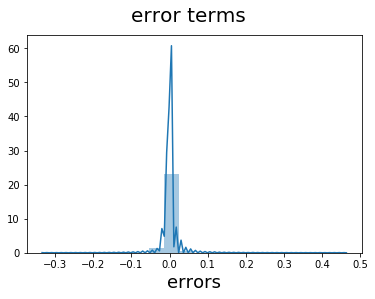

In [70]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)  

In [71]:
df_test[varlist1] = scaler.transform(df_test[varlist1])

In [72]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [73]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [74]:
col1

Index(['units', 'product_mrp', 'Discount_Percentage', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'SEM', 'Other', 'Affiliates', 'NPS', 'NPSScore',
       'product_analytic_vertical_KaraokePlayer'],
      dtype='object')

In [75]:
# Let's now drop the variables we had manually eliminated as well
# X_test_rfe2 = X_test_rfe2.drop(['SEM', 'Total Investment', 'Online marketing', 'Sponsorship', 'Affiliates', 'TV', 
#                                'Other', 'Digital'], axis = 1)

X_test_rfe2 = X_test_rfe2.drop(['Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'SEM', 'Other', 'Affiliates', 'NPS'], axis = 1)


In [76]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29217 entries, 46844 to 57289
Data columns (total 6 columns):
const                                      29217 non-null float64
units                                      29217 non-null float64
product_mrp                                29217 non-null float64
Discount_Percentage                        29217 non-null float64
NPSScore                                   29217 non-null float64
product_analytic_vertical_KaraokePlayer    29217 non-null uint8
dtypes: float64(5), uint8(1)
memory usage: 1.4 MB


In [77]:
# Making predictions
y_pred = lm_11.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

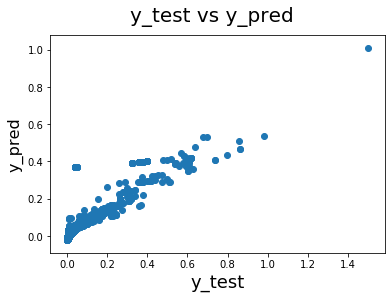

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [79]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8028900509097474

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [81]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.01863702577321434

In [82]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [83]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
regr.score(X_test, y_test)

0.8214972458040816

In [85]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)  

Cross Validation scores:  [0.80540966 0.82101411 0.80799721 0.79864467 0.75741326]
Mean and std deviation:  0.7980957785193412 0.02159698918257703


0.8214972458040816

In [86]:
accuracy

0.8202872885981871

In [87]:
scores

array([0.80540966, 0.82101411, 0.80799721, 0.79864467, 0.75741326])

### Elasticity coefficients

In [986]:
elas = pd.DataFrame(X_train_rfe1.columns)

In [987]:
elas.head()

,0
0,const
1,units
2,product_mrp
3,Discount_Percentage
4,NPSScore


In [989]:
elas['coef'] = pd.Series(regr.coef_)

In [992]:
elas.head()

,0,coef
0,const,0.38
1,units,0.01
2,product_mrp,0.00
3,Discount_Percentage,0.47
4,NPSScore,0.00


In [993]:
elas = elas.iloc[1:, :]

In [994]:
elas.head()

,0,coef
1,units,0.01
2,product_mrp,0.00
3,Discount_Percentage,0.47
4,NPSScore,0.00
5,product_analytic_vertical_KaraokePlayer,0.00


In [1014]:
for ind in elas.index:
    if elas[0][ind] in ['units', 'product_mrp', 'Discount_Percentage', 'NPSScore', 'product_analytic_vertical_KaraokePlayer']:
        elas_coef = elas['coef'][ind] * (np.mean(home_audio[elas[0][ind]]) / np.mean(home_audio['gmv']))
        print(elas_coef)

2.612780274028316e-06
0.0022050606833364035
0.008346913591465686
2.6204141512444807e-07
1.9005066650949987e-14


### Different types of regression

In [88]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8080299641125643
0.1


In [89]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021961344CC8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.8080501166402225
0.25080893296511264


In [90]:
# model with optimal alpha
lm = Ridge(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8097126287021167
0.8216774502082274


In [91]:
rmse = sqrt(mean_squared_error(y_test_pred, y_test))

print(rmse)

0.017726600842334943
